<h1>Final Project: Topic Classification Model</h1>
<p><strong>Presented By: </strong>Josiah Ball<br>
<strong>Presented To: </strong>Professor Geena Kim<br>
<strong>Class: </strong>DTSA 5509 Introduction to Machine Learning: Supervised Learning<br>
<strong>Date: </strong>November 6, 2024</p>

## Supervised Learning Problem Description
<p>The supervised learning problem that I will address is a topic classification problem.</p>
<p>I am using the <a src="https://www.kaggle.com/datasets/kotartemiy/topic-labeled-news-dataset" target="_blank">"Topic Labeled News Dataset"</a> from the public domain published on Kaggle by Artem Bugara. The dataset consists of 108,691 news articles that are labelled by topic out of the list below:</p>
<ul><li>BUSINESS</li>
<li>ENTERTAINMENT</li>
<li>HEALTH</li>
<li>NATION</li>
<li>SCIENCE</li>
<li>SPORTS</li>
<li>TECHNOLOGY</li>
<li>WORLD</li></ul>
<p><strong>In this notebook, I will create a topic classification supervised learning model using both KNN and random forests to predict the topic of the article based on the title.</strong> I will compare the results of the two models and choose the model with higher performance.</p>

## Methodology
<p>In this notebook, I will attempt the following:</p>
<ol><li>Upload, clean, and explore the data</li>
    <li>Vectorize the text to a vector using <strong>TF-IDF</strong></li>
    <li>Build and train a <strong>KNN model</strong></li>
    <li>Build and train a <strong>Random Forest model</strong></li>
    <li>Compare the results of both models</li>
    <li>Discuss the results and possible strategies for model improvement</li>
    <li>Model Demos</li>
</ol>

## 1. Upload, clean, and explore the data

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Upload dataset
doc_path = "labelled_newscatcher_dataset.csv"
df = pd.read_csv(doc_path)#, index_col=0)

C:\Users\jball\AppData\Local\Temp\ipykernel_12376\1783111151.py:3: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(doc_path)#, index_col=0)


### Exploratory Data Analysis

In [7]:
print(len(df))
df.head()

108691


,topic,link,domain,published_date,title,lang,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,8/6/2020 13:59,A closer look at water-splitting's solar fuel ...,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,8/12/2020 15:14,An irresistible scent makes locusts swarm,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,8/13/2020 21:01,Artificial intelligence warning: AI will know ...,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,8/3/2020 22:18,Glaciers Could Have Sculpted Mars Valleys: Study,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,8/12/2020 19:54,Perseid meteor shower 2020: What time and how ...,en,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Remove junk columns
df1 = df[['topic','link','domain','title','published_date','lang']].copy()
df1.head()

,topic,link,domain,title,published_date,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,A closer look at water-splitting's solar fuel ...,8/6/2020 13:59,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,An irresistible scent makes locusts swarm,8/12/2020 15:14,NaN
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,Artificial intelligence warning: AI will know ...,8/13/2020 21:01,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,Glaciers Could Have Sculpted Mars Valleys: Study,8/3/2020 22:18,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,Perseid meteor shower 2020: What time and how ...,8/12/2020 19:54,en


In [11]:
# Check for NaNs
df1.isna().sum()

topic                 0
link                  0
domain               64
title                64
published_date       64
lang              25874
dtype: int64

In [13]:
# Since 64/108691 < 0.001% of our data, we will drop NaN values from domain, title, and published date
print(len(df1))
df2 = df1.dropna(subset=['domain', 'title', 'published_date']).copy()
print(len(df2))
print(df2.isna().sum())

108691
108627
topic                 0
link                  0
domain                0
title                 0
published_date        0
lang              25810
dtype: int64


In [15]:
# Check languages 
df1['lang'].value_counts(dropna=False)

lang
en     82817
NaN    25874
Name: count, dtype: int64

In [17]:
# Check proportion of NaNs by topic
print(df2.groupby(['topic'])['lang'].apply(lambda x: x.isnull().sum()))
print(df2['topic'].value_counts(dropna=False).sort_index())
df2.groupby(['topic'])['lang'].apply(lambda x: x.isnull().sum()) / df2['topic'].value_counts(dropna=False).sort_index()

topic
BUSINESS         4825
ENTERTAINMENT    2898
HEALTH           3494
NATION           3978
SCIENCE           678
SPORTS           3163
TECHNOLOGY       3238
WORLD            3536
Name: lang, dtype: int64
topic
BUSINESS         14975
ENTERTAINMENT    14985
HEALTH           14984
NATION           14982
SCIENCE           3772
SPORTS           14976
TECHNOLOGY       14981
WORLD            14972
Name: count, dtype: int64


topic
BUSINESS         0.322204
ENTERTAINMENT    0.193393
HEALTH           0.233182
NATION           0.265519
SCIENCE          0.179745
SPORTS           0.211205
TECHNOLOGY       0.216140
WORLD            0.236174
dtype: float64

In [19]:
# Because we want the model to only be used on english titles and the NaN proportion is roughly
# equivalent across all topics, we will drop records with NaN values in the 'lang' columns.
print(len(df2))
df3 = df2.dropna(subset=['lang']).copy()
print(len(df3))
print(df3['topic'].value_counts(dropna=False))

108627
82817
topic
ENTERTAINMENT    12087
SPORTS           11813
TECHNOLOGY       11743
HEALTH           11490
WORLD            11436
NATION           11004
BUSINESS         10150
SCIENCE           3094
Name: count, dtype: int64


In [21]:
# Check for imbalanced dataset
df3['topic'].value_counts(dropna=False)

topic
ENTERTAINMENT    12087
SPORTS           11813
TECHNOLOGY       11743
HEALTH           11490
WORLD            11436
NATION           11004
BUSINESS         10150
SCIENCE           3094
Name: count, dtype: int64

<p>NOTE: Since "SCIENCE" is a minority category, we will undersample the majority categories and take a smaller dataset.</p>
<p>NOTE: The dataset is still too large to be able to process at this size, so we are undersampling to 1000 records of each.</p>

In [24]:
from imblearn.under_sampling import RandomUnderSampler
y_temp = df3['topic']
X_temp = df3.loc[:, df3.columns != 'topic']
rus = RandomUnderSampler(random_state=42)
X1_temp, y1_temp = rus.fit_resample(X_temp,y_temp)
df4 = pd.concat([y1_temp, X1_temp], axis=1)
df4['topic'].value_counts(dropna=False)

topic
BUSINESS         3094
ENTERTAINMENT    3094
HEALTH           3094
NATION           3094
SCIENCE          3094
SPORTS           3094
TECHNOLOGY       3094
WORLD            3094
Name: count, dtype: int64

In [25]:
df5 = df4.groupby('topic').apply(lambda x: x.sample(n=min(1000, len(x)), random_state=42)).reset_index(drop=True)
df5['topic'].value_counts(dropna=False)

C:\Users\jball\AppData\Local\Temp\ipykernel_12376\2315058229.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df5 = df4.groupby('topic').apply(lambda x: x.sample(n=min(1000, len(x)), random_state=42)).reset_index(drop=True)


topic
BUSINESS         1000
ENTERTAINMENT    1000
HEALTH           1000
NATION           1000
SCIENCE          1000
SPORTS           1000
TECHNOLOGY       1000
WORLD            1000
Name: count, dtype: int64

In [26]:
# Return clean dataset
df_clean = df5.copy()

In [27]:
df_clean.head()

,topic,link,domain,title,published_date,lang
0,BUSINESS,https://nairametrics.com/2020/08/11/how-to-pro...,nairametrics.com,How to protect your crypto from cyber robbers,8/11/2020 7:19,en
1,BUSINESS,https://www.globenewswire.com/news-release/202...,globenewswire.com,B2Digital's Greg Bell and Chris Lytle Discuss ...,8/14/2020 12:30,en
2,BUSINESS,https://asia.nikkei.com/Business/Companies/Ali...,asia.nikkei.com,Alibaba's Ant targets largest-ever $30bn IPO: ...,8/3/2020 15:52,en
3,BUSINESS,https://www.reuters.com/article/us-lord-taylor...,reuters.com,Breakingviews - Retail’s WeWork escape hatch i...,8/3/2020 20:28,en
4,BUSINESS,https://www.hertfordshiremercury.co.uk/news/he...,hertfordshiremercury.co.uk,The 19 countries removed from UK quarantine li...,8/14/2020 6:47,en


## 2. Vectorize the text to a vector using TF-IDF

<p><em>NOTE: If you are unfamiliar with TF-IDF, a great overview is given in this video: <a href="https://www.youtube.com/watch?v=D2V1okCEsiE" target="_blank">https://www.youtube.com/watch?v=D2V1okCEsiE</a></em></p>

In [35]:
# Import TF-IDF Vectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# TF-IDF Vectorization
corpus = df_clean['title']
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
dense_list = dense.tolist()
vectors_df = pd.DataFrame(dense_list, columns=feature_names)

In [37]:
df_clean['TF-IDF Vector'] = dense_list
df_clean.head()

,topic,link,domain,title,published_date,lang,TF-IDF Vector
0,BUSINESS,https://nairametrics.com/2020/08/11/how-to-pro...,nairametrics.com,How to protect your crypto from cyber robbers,8/11/2020 7:19,en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,BUSINESS,https://www.globenewswire.com/news-release/202...,globenewswire.com,B2Digital's Greg Bell and Chris Lytle Discuss ...,8/14/2020 12:30,en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,BUSINESS,https://asia.nikkei.com/Business/Companies/Ali...,asia.nikkei.com,Alibaba's Ant targets largest-ever $30bn IPO: ...,8/3/2020 15:52,en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,BUSINESS,https://www.reuters.com/article/us-lord-taylor...,reuters.com,Breakingviews - Retail’s WeWork escape hatch i...,8/3/2020 20:28,en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,BUSINESS,https://www.hertfordshiremercury.co.uk/news/he...,hertfordshiremercury.co.uk,The 19 countries removed from UK quarantine li...,8/14/2020 6:47,en,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [39]:
# View TF-IDF Vectors
vectors_df
vectors_df['the']

0       0.000000
1       0.093512
2       0.000000
3       0.000000
4       0.132386
          ...   
7995    0.000000
7996    0.000000
7997    0.000000
7998    0.000000
7999    0.000000
Name: the, Length: 8000, dtype: float64

## 3. Build and train a KNN model

In [41]:
# Create train / validation / test split
from sklearn.model_selection import train_test_split
seed = 42
df_train_validation, df_test = train_test_split(df_clean, test_size=0.2, random_state=seed, stratify=df_clean.topic)
df_train, df_validation = train_test_split(df_train_validation, test_size=0.25, random_state=seed, stratify=df_train_validation.topic)

In [43]:
# Check counts and proportions of raining, validation, and testing datasets 
print(len(df_clean))
print(len(df_train))
print(len(df_validation))
print(len(df_test))
print(df_train.groupby('topic').count().title/len(df_train))
print(df_validation.groupby('topic').count().title/len(df_validation))
print(df_test.groupby('topic').count().title/len(df_test))

8000
4800
1600
1600
topic
BUSINESS         0.125
ENTERTAINMENT    0.125
HEALTH           0.125
NATION           0.125
SCIENCE          0.125
SPORTS           0.125
TECHNOLOGY       0.125
WORLD            0.125
Name: title, dtype: float64
topic
BUSINESS         0.125
ENTERTAINMENT    0.125
HEALTH           0.125
NATION           0.125
SCIENCE          0.125
SPORTS           0.125
TECHNOLOGY       0.125
WORLD            0.125
Name: title, dtype: float64
topic
BUSINESS         0.125
ENTERTAINMENT    0.125
HEALTH           0.125
NATION           0.125
SCIENCE          0.125
SPORTS           0.125
TECHNOLOGY       0.125
WORLD            0.125
Name: title, dtype: float64


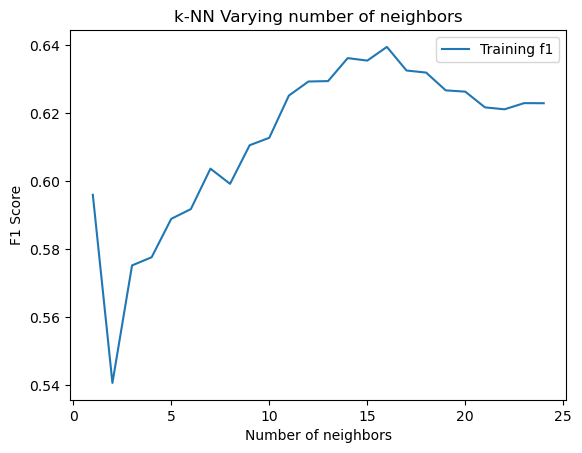

In [45]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,25)
test_metric = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(df_train['TF-IDF Vector'].tolist(), df_train.topic.tolist())
    
    #Compute accuracy on the test set
    y_pred = knn.predict(df_validation['TF-IDF Vector'].tolist())
    clf_rep = classification_report(df_validation.topic.tolist(), y_pred, output_dict=True)
    test_metric[i] = clf_rep['macro avg']['f1-score']
    
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_metric, label='Training f1')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('F1 Score')
plt.show()

In [47]:
# Find k that maximizes F1-Score
index_maxval = np.argmax(test_metric)
index_maxval

15

In [49]:
test_metric[index_maxval]

0.6393731891731794

In [51]:
# Thus, k = 16 mazimizes performance on the validation dataset
maxval = index_maxval + 1

In [53]:
# Fit KNN with maxval
knn = KNeighborsClassifier(n_neighbors=maxval)
knn.fit(df_train['TF-IDF Vector'].tolist(), df_train.topic.tolist())

KNeighborsClassifier(n_neighbors=16)

## 4. Build and train a Random Forest model

In [55]:
from sklearn.ensemble import RandomForestClassifier
import math
n_predictors = len(df_clean['TF-IDF Vector'][0])
sqrt_n_predictors = round(math.sqrt(n_predictors))
min_predictors = sqrt_n_predictors - 50
max_predictors = sqrt_n_predictors + 50

In [65]:
rf_classifier = RandomForestClassifier(n_estimators=sqrt_n_predictors, random_state=42)
rf_classifier.fit(df_train['TF-IDF Vector'].tolist(), df_train.topic.tolist())
y_pred = rf_classifier.predict(df_validation['TF-IDF Vector'].tolist())

In [67]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(df_validation.topic.tolist(), y_pred))

               precision    recall  f1-score   support

     BUSINESS       0.63      0.42      0.50       200
ENTERTAINMENT       0.58      0.58      0.58       200
       HEALTH       0.53      0.70      0.60       200
       NATION       0.34      0.55      0.42       200
      SCIENCE       0.80      0.78      0.79       200
       SPORTS       0.80      0.63      0.70       200
   TECHNOLOGY       0.66      0.67      0.66       200
        WORLD       0.57      0.34      0.43       200

     accuracy                           0.58      1600
    macro avg       0.61      0.58      0.59      1600
 weighted avg       0.61      0.58      0.59      1600



In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(min_predictors, max_predictors),
    'max_depth': randint(1, 20)
}
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(df_train['TF-IDF Vector'].tolist(), df_train.topic.tolist())
best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 140}


## 5. Compare the results of both models

In [82]:
# KNN Performance
knn_y_pred = knn.predict(df_test['TF-IDF Vector'].tolist())
print(classification_report(df_test.topic.tolist(), knn_y_pred))

               precision    recall  f1-score   support

     BUSINESS       0.61      0.58      0.59       200
ENTERTAINMENT       0.71      0.65      0.68       200
       HEALTH       0.46      0.76      0.57       200
       NATION       0.51      0.37      0.43       200
      SCIENCE       0.69      0.81      0.74       200
       SPORTS       0.81      0.68      0.74       200
   TECHNOLOGY       0.74      0.71      0.72       200
        WORLD       0.51      0.41      0.46       200

     accuracy                           0.62      1600
    macro avg       0.63      0.62      0.62      1600
 weighted avg       0.63      0.62      0.62      1600



In [84]:
rf_y_pred = best_rf.predict(df_test['TF-IDF Vector'].tolist())
print(classification_report(df_test.topic.tolist(), rf_y_pred))

               precision    recall  f1-score   support

     BUSINESS       0.60      0.38      0.46       200
ENTERTAINMENT       0.45      0.57      0.50       200
       HEALTH       0.53      0.68      0.60       200
       NATION       0.30      0.42      0.35       200
      SCIENCE       0.76      0.69      0.72       200
       SPORTS       0.65      0.59      0.62       200
   TECHNOLOGY       0.68      0.67      0.67       200
        WORLD       0.44      0.27      0.34       200

     accuracy                           0.53      1600
    macro avg       0.55      0.53      0.53      1600
 weighted avg       0.55      0.53      0.53      1600



## 6. Discuss the results and possible strategies for model improvement

<p>From these results, we see that our initial KNN model is performing better than our initial random forest by accuracy, Macro F1 score, Macro Average Recall, and Macro Average Precision.</p>
<p>Some limitations of this result include:</p>
<ul><li><strong>Jupyter Notebook Limitation: </strong>We had to shrink the dataset due to the computational ineffeciency of TF-IDF. we are utilizing about 1/10th of the labelled dataset for our training, validation, and testing datasets because Jupyter Notebooks crashes computing that many TF-IDF vectors.</li>
    <li><strong>TF-IDF: </strong>In addition to the issue above, TF-IDF also suffers from the curse of dimensionality. Both of these issues could be solved by using dimension reduction techniques (such as PCA) or by utilizing another vectorizing method (such as an AI embeddings model).</li>
<li><strong>KNN: </strong>Our KNN result had strong performance out of the box, but the techniques used to counter the imbalance in our dataset may be skewing the results of our model. It could be optimal to use oversampling methods such as SMOTE or ADASYN on our one minority class than minimize the sample sizes of all the remaining classes.</li>
<li><strong>Random Forest: </strong>It surprised me that the random forest performed so poorly, given how the large number of predictors present in TF-IDF (upwards of 15,000). </li>
<li><strong>Steps for Further Improvement: </strong>In order to improve these results further, we could try one of the following:
    <ul><li>Make the suggested edits for the problems raised by using TF-IDF above (such as use Principal Component Analysis to reduce dimensionality or use an AI Embeddings model to vectorize the text.</li>
        <li>Expand our training dataset using the available data.</li>
        <li>Implement other supervised machine learning methods such as Gradient Boosting or Support Vector Machines.</li>
    </ul></li>
</ul>

## 7. Model Demos

In [117]:
# Define demo function
def predict_knn_rf(new_input, vectorizer=vectorizer, feature_names=feature_names):
    new_vector = vectorizer.transform([new_input])
    dense_new_vector = new_vector.todense()
    tf_idf = dense_new_vector.tolist()
    knn_pred = knn.predict(tf_idf)
    print('KNN Prediction: ',knn_pred)
    rf_pred = best_rf.predict(tf_idf)
    print('Random Forest Prediction: ',rf_pred)

In [151]:
predict_knn_rf("Marc Guéhi wears 'Jesus loves you' armband despite FA warning")

KNN Prediction:  ['SPORTS']
Random Forest Prediction:  ['SPORTS']
